<a href="https://colab.research.google.com/github/shaqiru/ProyekPython/blob/main/Submission_Machine_Learning_Pemula_Shaquille_A_Jabbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Shaquille Abdul Jabbar

Submission Machine Learning untuk Pemula


# Fetch Dataset

In [ ]:
#!wget --no-check-certificate \
#https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

# Kode Program


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os, zipfile

from matplotlib import pyplot as plt

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.961):
      print("Akurasi telah melebihi 96%, operasi dihentikan")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
pip install split_folders

In [ ]:
from splitfolders import split
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
split.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))

train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 4091.13 files/s]


In [ ]:
rock_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [ ]:
train_rock_dir, val_roc_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [ ]:
train_rock = os.path.join (train_dir, 'rock')
train_pap = os.path.join (train_dir, 'paper')
train_sci = os.path.join (train_dir, 'scissors')
val_rock = os.path.join (validation_dir, 'rock')
val_pap = os.path.join (validation_dir, 'paper')
val_sci = os.path.join (validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=8,
        class_mode='categorical'
        )
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150),
        batch_size=8, 
        class_mode='categorical'
        )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
  ])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose =2,
      callbacks=[callbacks]
    )

Epoch 1/20
41/41 - 18s - loss: 0.6392 - accuracy: 0.3506 - val_loss: 0.6401 - val_accuracy: 0.3333
Epoch 2/20
41/41 - 18s - loss: 0.6349 - accuracy: 0.3476 - val_loss: 0.6134 - val_accuracy: 0.5370
Epoch 3/20
41/41 - 18s - loss: 0.5752 - accuracy: 0.5457 - val_loss: 0.5800 - val_accuracy: 0.5046
Epoch 4/20
41/41 - 18s - loss: 0.4077 - accuracy: 0.7591 - val_loss: 0.3207 - val_accuracy: 0.8056
Epoch 5/20
41/41 - 18s - loss: 0.2519 - accuracy: 0.8476 - val_loss: 0.3709 - val_accuracy: 0.8194
Epoch 6/20
41/41 - 18s - loss: 0.1986 - accuracy: 0.8902 - val_loss: 0.1769 - val_accuracy: 0.9167
Epoch 7/20
41/41 - 18s - loss: 0.1553 - accuracy: 0.9146 - val_loss: 0.2441 - val_accuracy: 0.8657
Epoch 8/20
41/41 - 18s - loss: 0.2095 - accuracy: 0.8780 - val_loss: 0.1214 - val_accuracy: 0.9259
Epoch 9/20
41/41 - 18s - loss: 0.1436 - accuracy: 0.9238 - val_loss: 0.1667 - val_accuracy: 0.8981
Epoch 10/20
41/41 - 18s - loss: 0.1728 - accuracy: 0.9116 - val_loss: 0.1314 - val_accuracy: 0.9444
Epoch 11/

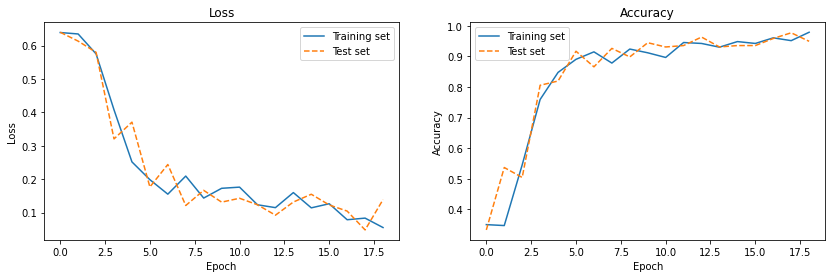

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Test set', linestyle='--')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(accuracy, label='Training set')
plt.plot(val_accuracy, label='Test set', linestyle='--')
plt.legend()

plt.show()

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
0bioBZYFCXqJIulm.png
rock


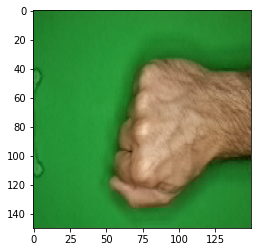

In [ ]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')